### Bootstrapping ua ###

Bootstrapping the data for the zonal wind field at 850 hPa.

In [1]:
# local imports
import os
import sys
import glob

# third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the functions
sys.path.append("/home/users/benhutch/skill-maps/python")
from functions import forecast_stats, process_observations

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
# set up the base directory
base_dir = "/gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/test-sfcWind/"

# set up the fname
fname_ua_ondjfm = "ua_AYULGS_global_1961_2014_2-9_4_1736764804.7134302.npy"

# load in the data
fcst1_nm = np.load(os.path.join(base_dir, fname_ua_ondjfm))

In [3]:
# print the shape of fcst1_nm
print(fcst1_nm.shape)

(54, 48, 72, 144)


In [4]:
# Process the observations
obs = process_observations(
    variable="ua",
    region="global",
    region_grid=None,
    forecast_range="2-9",
    season="AMJJAS",
    observations_path="/gws/nopw/j04/canari/users/benhutch/ERA5/global_regrid_sel_region_var131_85000.nc",
    obs_var_name="var131",
    plev=85000,
)

Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is ua or va, creating new file name
Regrid and select region file: /gws/nopw/j04/canari/users/benhutch/ERA5/global_regrid_sel_region_var131.nc
File already exists
Loading ERA5 data


Observations dataset: [[[[ 3.05175781e-05  3.05175781e-05  3.05175781e-05 ...  3.05175781e-05
     3.05175781e-05  3.05175781e-05]
   [ 3.08889771e+00  3.21585083e+00  3.33499146e+00 ...  2.67776489e+00
     2.81838989e+00  2.95608521e+00]
   [ 3.21585083e+00  3.41506958e+00  3.53421021e+00 ...  2.59573364e+00
     2.74905396e+00  2.96585083e+00]
   ...
   [ 2.19179993e+01  2.20303040e+01  2.20771790e+01 ...  2.12031555e+01
     2.15029602e+01  2.17392883e+01]
   [ 2.23076477e+01  2.24551086e+01  2.25342102e+01 ...  2.14785461e+01
     2.18252258e+01  2.20967102e+01]
   [ 2.12324524e+01  2.14609680e+01  2.16367493e+01 ...  2.02314758e+01
     2.06172180e+01  2.09502258e+01]]

  [[-5.64575195e-04 -5.64575195e-04 -5.64575195e-04 ... -5.64575195e-04
    -5.64575195e-04 -5.64575195e-04]
   [ 3.88420105e+00  4.08341980e+00  4.27677917e+00 ...  3.25724792e+00
     3.46818542e+00  3.67716980e+00]
   [ 4.93888855e+00  5.22404480e+00  5.44670105e+00 ...  4.08732605e+00
     4.33146667e+00  4.61

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/xarray/groupers.py:392: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


Observations annual mean anomalies: [[[ 7.30609114e-04  7.30609114e-04  7.30609114e-04 ...  7.30609114e-04
    7.30609114e-04  7.30609114e-04]
  [-3.25320393e-01 -2.98573494e-01 -2.71585613e-01 ... -4.08037335e-01
   -3.81968647e-01 -3.53344291e-01]
  [ 4.72978763e-02 -2.26643477e-02  2.04242077e-02 ... -2.40296517e-02
   -1.00868382e-01 -2.64265928e-02]
  ...
  [ 1.87264755e-01  1.69903889e-01  9.73470807e-02 ...  2.04253972e-01
    1.95849419e-01  2.05180183e-01]
  [ 3.28185081e-01  3.31971586e-01  3.56834322e-01 ...  2.15503857e-01
    2.44999945e-01  2.96103895e-01]
  [ 4.46970850e-01  4.16257173e-01  3.84147048e-01 ...  5.40182769e-01
    5.16757727e-01  4.81782824e-01]]

 [[ 1.03069865e-03  1.03069865e-03  1.03069865e-03 ...  1.03069865e-03
    1.03069865e-03  1.03069865e-03]
  [ 1.35917187e-01  1.45574257e-01  1.67679310e-01 ...  1.46136448e-01
    1.51371792e-01  1.42072991e-01]
  [ 3.73440571e-02  8.72298051e-03 -7.77457580e-02 ... -2.42178440e-02
    3.76113248e-03 -5.7311850

In [5]:
fcst1_nm.shape

(54, 48, 72, 144)

In [6]:
# constrain obs between 1969-01-01 and 2020-01-01
obs_constr = obs.loc["1969-01-01":"2019-12-31"]

# print the shape of the obs
obs_constr.shape


(51, 72, 144)

In [7]:
# extract the value of the observations
obs_values = obs_constr.values

In [8]:
obs_values.shape

(51, 72, 144)

In [9]:
fcst1_nm_constr = fcst1_nm[3:, :, :, :]

# print the shape of fcst1_nm_constr
print(fcst1_nm_constr.shape)

(51, 48, 72, 144)


In [10]:
# # set up the fname
# fname_ua_ondjfm = "ua_AYULGS_global_1961_2014_2-9_4_1736529148.4901805.npy"

# # load in the data
# fcst1_nm = np.load(os.path.join(base_dir, fname_ua_ondjfm))

# # print the shape of the forecast
# fcst1_nm.shape

In [11]:
# limit to the first 47 members
fcst1_nm = fcst1_nm[:, :47, :, :]

In [14]:
fcst1_nm_constr_sel = fcst1_nm_constr[:, :47, :, :]

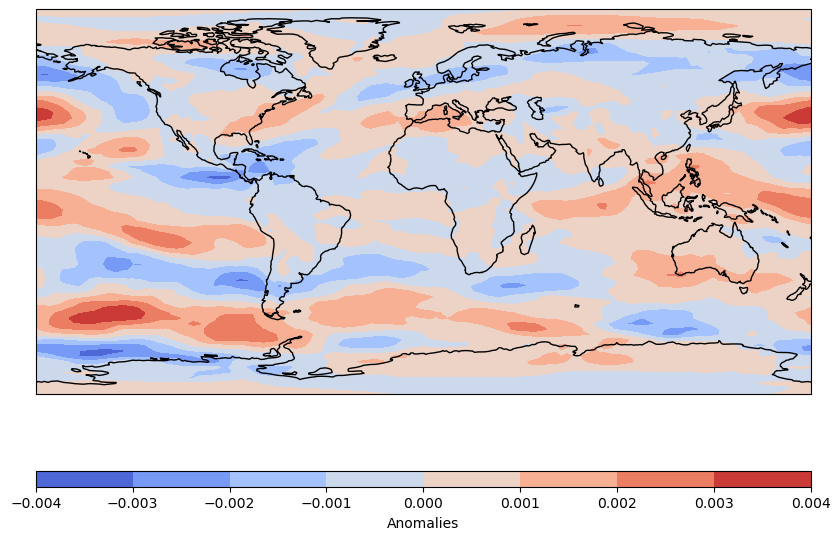

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



# Set up the lats and lons
lats = np.arange(-90, 90, 2.5)
lons = np.arange(-180, 180, 2.5)


# # Open the file
# ds = xr.open_dataset(fpath)

# Set up the figure with Cartopy projection
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines
ax.coastlines()

# np.shape(ds["ua"].mean("time"))

# Plot the data
im = ax.contourf(lons, lats, np.mean(fcst1_nm_constr_sel, axis=(0, 1)), transform=ccrs.PlateCarree(), cmap="coolwarm")

# Add colorbar
fig.colorbar(im, ax=ax, orientation="horizontal", label="Anomalies", pad=0.1, aspect=50)

# Show the plot
plt.show()

In [11]:
obs_constr_raw = obs.loc["1966-01-01":"2019-12-31"]

# print the shape of the obs
obs_constr_raw.shape

(54, 72, 144)

In [12]:
# swap the axes of the forecast (0th and 1th)
fcst1_nm_swapped = np.swapaxes(fcst1_nm, 0, 1)

fcst1_nm_swapped.shape

(68, 54, 72, 144)

In [13]:
# create a dummy array of the same shape as fcst1_nm
fcst2_ph = np.zeros_like(fcst1_nm_swapped)

In [14]:
# count the number of nans in fcst1_nm_swapped
print(np.isnan(fcst1_nm_swapped).sum())

0


In [16]:
obs_values.shape

(51, 72, 144)

In [17]:
fcst1_nm_constr_sel.shape

(51, 47, 72, 144)

In [18]:
fcst1_nm_constr_sel_swap = np.swapaxes(fcst1_nm_constr_sel, 0, 1)

fcst2_ph = np.zeros_like(fcst1_nm_constr_sel_swap)

In [19]:
%%time

fcst_stats = forecast_stats(
    obs=obs_values,
    forecast1=fcst1_nm_constr_sel_swap,
    forecast2=fcst2_ph,
    no_boot=5,
)

bootstrap index 0


shape of obs_boot (51, 72, 144)


/home/users/benhutch/skill-maps/python/functions.py:7209: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r12, _ = pearsonr(f1_cell, f2_cell)
/home/users/benhutch/skill-maps/python/functions.py:7211: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r2o, _ = pearsonr(f2_cell, o_cell)
/home/users/benhutch/skill-maps/python/functions.py:7242: RuntimeWarning: invalid value encountered in scalar divide
  sig_f2 / np.std(fcst2_boot[:, :, lat, lon])
/home/users/benhutch/skill-maps/python/functions.py:7256: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r12_1, _ = pearsonr(f1_cell, f2_1_cell)
/home/users/benhutch/skill-maps/python/functions.py:7258: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r2o_1, _ = pearsonr(f2_1_cell, o_cell)
/home/users/benhutch/skill-maps/python/functions.py:7260: ConstantInput

bootstrap index 1
shape of obs_boot (51, 72, 144)
bootstrap index 2
shape of obs_boot (51, 72, 144)
bootstrap index 3
shape of obs_boot (51, 72, 144)
bootstrap index 4
shape of obs_boot (51, 72, 144)


/home/users/benhutch/skill-maps/python/functions.py:7565: RuntimeWarning: divide by zero encountered in scalar divide
  sigo_cell / sig2_cell
/home/users/benhutch/skill-maps/python/functions.py:7570: RuntimeWarning: divide by zero encountered in scalar divide
  sig1_cell / sig2_cell
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


CPU times: user 4min 44s, sys: 1.07 s, total: 4min 45s
Wall time: 4min 47s


In [20]:
fcst_stats["corr1"]

array([[ 0.09963119,  0.11573375,  0.13071085, ...,  0.04484411,
         0.06413491,  0.08241653],
       [-0.12322368, -0.14277618, -0.16079606, ..., -0.06796541,
        -0.08515436, -0.10349181],
       [ 0.10787818, -0.00741528, -0.04905425, ..., -0.07668845,
        -0.02910435,  0.09356363],
       ...,
       [-0.1660043 , -0.18050634, -0.19528786, ..., -0.11767098,
        -0.13105417, -0.14896969],
       [-0.04192982, -0.04481614, -0.03667412, ..., -0.04276412,
        -0.04797593, -0.04632654],
       [ 0.13917217,  0.15474546,  0.17138947, ...,  0.08500218,
         0.10475798,  0.12309279]])

In [21]:
# print the mean of the correlation
print(fcst_stats["corr1"].mean())

# print the spread of the correlation
print(fcst_stats["corr1"].std())

# print the min of the correlation
print(fcst_stats["corr1"].min())

# print the max of the correlation
print(fcst_stats["corr1"].max())

-0.023698933935098313
0.1339097536365962
-0.42943294637779406
0.4443925634417663


In [22]:
fcst_stats["corr1"].shape

(72, 144)

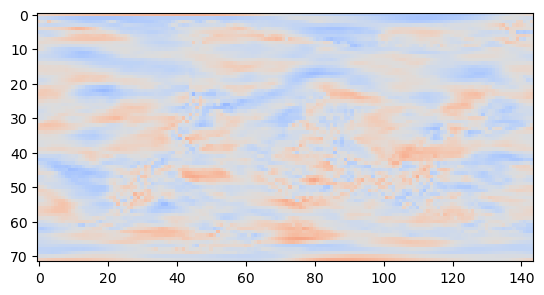

In [23]:
# plot the correlation
fig, ax = plt.subplots()

# plot the corr1 as a spatial plot
im = ax.imshow(fcst_stats["corr1"], cmap="coolwarm", vmin=-1, vmax=1)


In [24]:
from paper1_plots_functions import check_bootstraps_exist, create_bs_dict, plot_diff_variables

sys.path.append("/home/users/benhutch/skill-maps")
import dictionaries as dicts

In [39]:
# Set up the variables
variables = ["tas", "sfcWind", "rsds", "psl"]
no_bootstraps_list = [1000, 1000, 1000, 1000]
no_bootstraps_list2 = [1]
season = "AMJJAS"
model_season = "AYULGS"
forecast_range = "2-9"
methods1 = ["alt_lag", "alt_lag", "alt_lag", "alt_lag"]
gridbox_corr_list = [
    dicts.uk_grid,
    dicts.med_box_focus,
    dicts.scandi_box,
    dicts.n_eur_wind_box,
]
# methods2 = ["new_raw", "new_raw"]
# methods_diff = "NAO-matched - lag"
# # method = "new_raw"

In [40]:
existing_files = check_bootstraps_exist(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    method=methods1,
)

Checking whether bootstraps exist for method alt_lag...
Checking whether bootstraps exist for variable tas...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable sfcWind...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable rsds...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable psl...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for method alt_lag...
Checking whether bootstraps exist for variable tas...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable sfcWind...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable rsds...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable psl...
Checking whether bootstraps exist for 1000 boot

In [41]:
stats_dict = create_bs_dict(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    methods=methods1,
    model_season=model_season,
    load_hist=False,
)

Processing variable tas...
Processing 1000 bootstraps...
base_path = /gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/AMJJAS/2-9/alt_lag/no_bootstraps_1000
Processing variable sfcWind...
Processing 1000 bootstraps...
base_path = /gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/AMJJAS/2-9/alt_lag/no_bootstraps_1000
Processing variable rsds...
Processing 1000 bootstraps...
base_path = /gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/AMJJAS/2-9/alt_lag/no_bootstraps_1000
Processing variable psl...
Processing 1000 bootstraps...
base_path = /gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/AMJJAS/2-9/alt_lag/no_bootstraps_1000


In [42]:
stats_dict.keys()

dict_keys([('tas', 'nboot_1000', 'alt_lag'), ('sfcWind', 'nboot_1000', 'alt_lag'), ('rsds', 'nboot_1000', 'alt_lag'), ('psl', 'nboot_1000', 'alt_lag')])

In [43]:
# # change the 'sfcWind' 'nboot_1000' 'nao_matched' key
# # to 'ua' 'nboot_1' 'nao_matched'
# stats_dict[('ua', 'nboot_3', 'alt_lag')] = stats_dict.pop(('sfcWind', 'nboot_1000', 'alt_lag'))

In [44]:
fcst_stats.keys()

dict_keys(['corr1', 'corr1_min', 'corr1_max', 'corr1_p', 'corr2', 'corr2_min', 'corr2_max', 'corr2_p', 'corr10', 'corr10_min', 'corr10_max', 'corr10_p', 'msss1', 'msss1_min', 'msss1_max', 'msss1_p', 'corr12', 'corr12_min', 'corr12_max', 'corr12_p', 'rpc1', 'rpc1_min', 'rpc1_max', 'rpc1_p', 'rpc2', 'rpc2_min', 'rpc2_max', 'rpc2_p', 'corr_diff', 'corr_diff_min', 'corr_diff_max', 'corr_diff_p', 'partialr', 'partialr_min', 'partialr_max', 'partialr_p', 'partialr_bias', 'nens1', 'nens2', 'sigo', 'sigo_resid', 'obs_resid', 'fcst1_em_resid', 'f1_ts', 'f2_ts', 'f10_ts', 'o_ts', 'f1_ts_short', 'o_ts_short', 'corr1_short', 'corr1_p_short'])

In [45]:
# stats_dict[('ua', 'nboot_3', 'alt_lag')]["corr1"] = fcst_stats["corr1"]
# stats_dict[('ua', 'nboot_3', 'alt_lag')]["corr1_p"] = fcst_stats["corr1_p"]
# stats_dict[('ua', 'nboot_3', 'alt_lag')]["f1_ts"] = fcst_stats["f1_ts"]
# stats_dict[('ua', 'nboot_3', 'alt_lag')]["o_ts"] = fcst_stats["o_ts"]

In [33]:
# fcst_stats["corr1"].mean()

np.float64(-0.023698933935098313)

In [63]:
stats_dict.keys()

dict_keys([('tas', 'nboot_1000', 'alt_lag'), ('sfcWind', 'nboot_1000', 'alt_lag'), ('rsds', 'nboot_1000', 'alt_lag'), ('psl', 'nboot_1000', 'alt_lag')])

In [64]:
# # change the 'sfcWind' 'nboot_1000' 'nao_matched' key
# # to 'ua' 'nboot_1' 'nao_matched'
stats_dict[('ua', 'nboot_1000', 'alt_lag')] = stats_dict.pop(('psl', 'nboot_1000', 'alt_lag'))

In [59]:
import importlib

importlib.reload(sys.modules["paper1_plots_functions"])

<module 'paper1_plots_functions' from '/home/users/benhutch/skill-maps/python/paper1_plots_functions.py'>

In [60]:
season

'AMJJAS'

In [61]:
from paper1_plots_functions import plot_diff_variables

Setting up the axis...
variables = ['tas', 'sfcWind', 'rsds', 'ua']
Plotting the correlations for a single method...
Plotting variable ('tas', 'nboot_1000', 'alt_lag')...
Plotting index 0...
start_year = [1969 2010]
end_year = [1969 2010]
nens1 = 712
for variable ('tas', 'nboot_1000', 'alt_lag')
fcst1_ts.shape = (51, 72, 144)
obs_ts.shape = (51, 72, 144)
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Setting up axis 3rd/4th time this?
Calculating the correlations with a specific gridbox...
As defined by gridbox_corr =  {'lon1': -10, 'lon2': 3, 'lat1': 50, 'lat2': 60}
Variable is not psl
Only using alt lag for bootstrapping ts here
------------------------------------------


AssertionError: No files found for tas_AMJJAS_global_1964_2014_2-9_4_*alternate_lag.npy

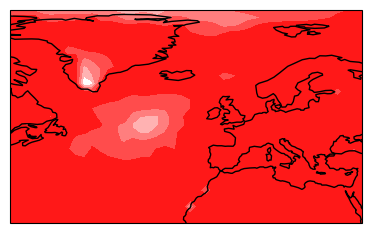

In [65]:
# plot the skill maps
plot_diff_variables(
    bs_skill_maps=stats_dict,
    season="AMJJAS",
    forecast_range=forecast_range,
    methods=["alt_lag", "alt_lag", "alt_lag", "raw"],
    figsize_x=10,
    figsize_y=8,
    gridbox_corr=[
        dicts.uk_grid,
        dicts.med_box_focus,
        dicts.scandi_box,
        dicts.n_eur_wind_box,
    ],
    gridbox_plot=dicts.north_atlantic_grid_plot,
    winter_n_gridbox_corr=dicts.iceland_grid_corrected,
    winter_s_gridbox_corr=dicts.azores_grid_corrected,
    corr_list=["corr1", "corr1", "corr1", "corr1"],
    ts_list=["f1_ts", "f1_ts", "f1_ts", "f1_ts"],
)